## Assignment 1: Data Analysis and Machine Learning

### \<Chia-Hao Lo> \<1907385>

#### How can we use data analytics and Machine Learning to predict energy usage for this house?

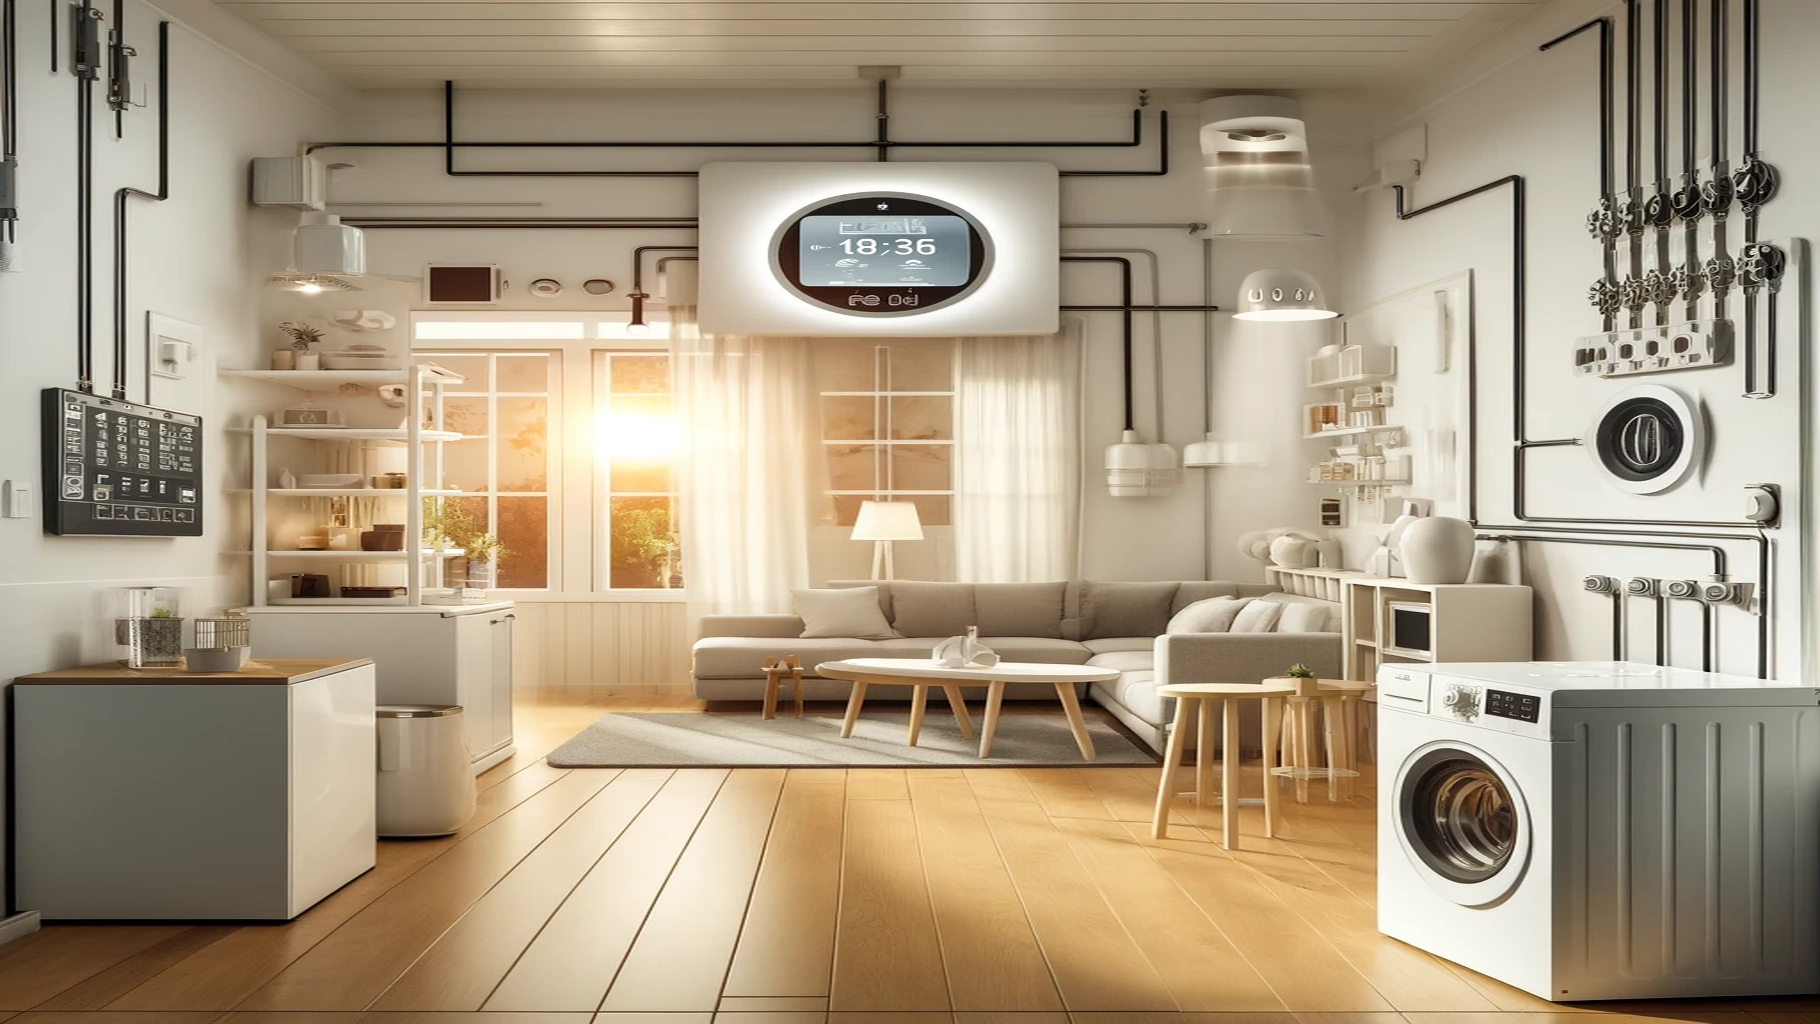

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

In [1]:
# seed the random numbers for reproducibility 
# do not remove this line
import random 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
random.seed(10)

#### Read the dataset

In [2]:
df = pd.read_csv('./data/energydata_complete.csv')
print(df.shape)
df.head()

(14941, 29)


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,14/02/2016 0:00,50,10,21.790000,39.900000,20.100000,40.79,21.39,40.59,19.2,...,18.0,41.933333,2.90,732.90,98.000000,2.000000,31.0,2.6,48.320978,48.320978
1,14/02/2016 0:10,50,0,21.790000,39.900000,20.033333,40.73,21.39,40.59,19.2,...,18.0,42.133333,2.87,732.95,98.166667,2.166667,28.5,2.6,33.339359,33.339359
2,14/02/2016 0:20,60,10,21.700000,39.933333,19.890000,40.79,21.39,40.53,19.2,...,18.0,42.360000,2.83,733.00,98.333333,2.333333,26.0,2.6,8.168115,8.168115
3,14/02/2016 0:30,40,0,21.633333,39.860000,19.890000,40.79,21.39,40.59,19.2,...,18.0,42.633333,2.80,733.05,98.500000,2.500000,23.5,2.6,16.197509,16.197509
4,14/02/2016 0:40,60,10,21.600000,39.900000,19.790000,40.79,21.39,40.59,19.1,...,18.0,42.860000,2.77,733.10,98.666667,2.666667,21.0,2.6,12.559574,12.559574


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14941 entries, 0 to 14940
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         14941 non-null  object 
 1   Appliances   14941 non-null  int64  
 2   lights       14941 non-null  int64  
 3   T1           14941 non-null  float64
 4   RH_1         14941 non-null  float64
 5   T2           14941 non-null  float64
 6   RH_2         14941 non-null  float64
 7   T3           14941 non-null  float64
 8   RH_3         14941 non-null  float64
 9   T4           14941 non-null  float64
 10  RH_4         14941 non-null  float64
 11  T5           14941 non-null  float64
 12  RH_5         14941 non-null  float64
 13  T6           14941 non-null  float64
 14  RH_6         14941 non-null  float64
 15  T7           14941 non-null  float64
 16  RH_7         14941 non-null  float64
 17  T8           14941 non-null  float64
 18  RH_8         14941 non-null  float64
 19  T9  

In [4]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,...,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000
mean,96.747206,3.235393,22.030776,39.418672,20.519140,39.935868,22.770465,38.046386,21.425985,37.701517,...,20.143157,40.454742,8.182569,755.575393,77.559434,3.671039,37.922696,4.055227,25.047636,25.047636
std,97.297111,7.296554,1.469766,3.880367,2.322643,4.328421,1.897689,2.530175,1.843571,3.701348,...,1.782497,3.566295,5.464633,6.613943,15.720014,2.218070,11.415145,4.220123,14.436670,14.436670
min,10.000000,0.000000,18.600000,27.023333,16.200000,20.463333,19.100000,28.766667,17.290000,27.660000,...,17.260000,29.166667,-4.400000,732.900000,24.000000,0.000000,1.000000,-6.100000,0.005322,0.005322
25%,50.000000,0.000000,21.000000,36.790000,18.890000,37.260000,21.390000,36.363333,20.100000,34.900000,...,18.571429,38.030000,4.230000,751.200000,66.666667,2.000000,29.000000,0.983000,12.593007,12.593007
50%,60.000000,0.000000,21.823333,38.790000,20.000000,39.900000,22.566667,37.760000,21.166667,37.200000,...,20.000000,39.863333,7.630000,755.700000,80.833333,3.166667,40.000000,3.600000,25.120708,25.120708
75%,100.000000,0.000000,22.890000,41.400000,21.830000,42.700000,24.033333,39.260000,22.738571,39.700000,...,20.890000,42.530000,11.400000,760.200000,90.833333,5.000000,40.000000,6.900000,37.454428,37.454428
max,900.000000,50.000000,26.260000,57.496667,29.856667,56.026667,29.236000,47.693333,26.200000,50.760000,...,24.500000,51.536000,26.100000,772.300000,100.000000,13.000000,66.000000,15.500000,49.992758,49.992758


### 1. Analyse and visualise the data

In [5]:
df_d = df.copy()

df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14941 entries, 0 to 14940
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         14941 non-null  object 
 1   Appliances   14941 non-null  int64  
 2   lights       14941 non-null  int64  
 3   T1           14941 non-null  float64
 4   RH_1         14941 non-null  float64
 5   T2           14941 non-null  float64
 6   RH_2         14941 non-null  float64
 7   T3           14941 non-null  float64
 8   RH_3         14941 non-null  float64
 9   T4           14941 non-null  float64
 10  RH_4         14941 non-null  float64
 11  T5           14941 non-null  float64
 12  RH_5         14941 non-null  float64
 13  T6           14941 non-null  float64
 14  RH_6         14941 non-null  float64
 15  T7           14941 non-null  float64
 16  RH_7         14941 non-null  float64
 17  T8           14941 non-null  float64
 18  RH_8         14941 non-null  float64
 19  T9  

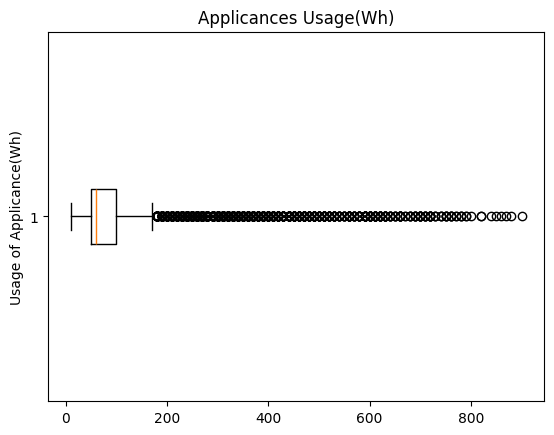

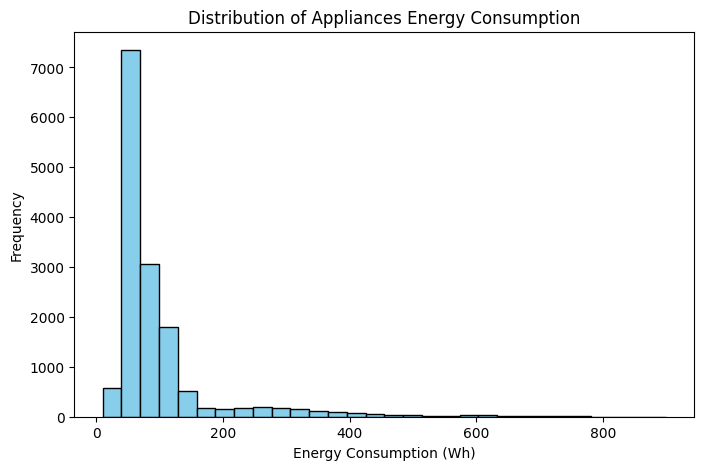

count    14941.000000
mean        96.747206
std         97.297111
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max        900.000000
Name: Appliances, dtype: float64

In [6]:
df_app = df_d['Appliances']

plt.boxplot(df_app, vert=False)
plt.title('Applicances Usage(Wh)')
plt.ylabel('Usage of Applicance(Wh)')

plt.figure(figsize=(8, 5))
plt.hist(df_d['Appliances'], bins=30, color='skyblue', edgecolor ='black')
plt.title("Distribution of Appliances Energy Consumption")
plt.xlabel("Energy Consumption (Wh)")
plt.ylabel("Frequency")
plt.show()

df_app.describe()

From the dataset we can see that the upper and lower quantil of usage in "Applicances" column is 50 and 100 respectively. There are many outliers and this is right-skewed data. From the paper it also mentioned it.

/var/folders/0l/qgn1vqn15c3gw9rx0_bhcwq40000gn/T/ipykernel_99658/1713086549.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_d['date'] = pd.to_datetime(df_d['date'])


Text(0, 0.5, 'Applicances (Wh)')

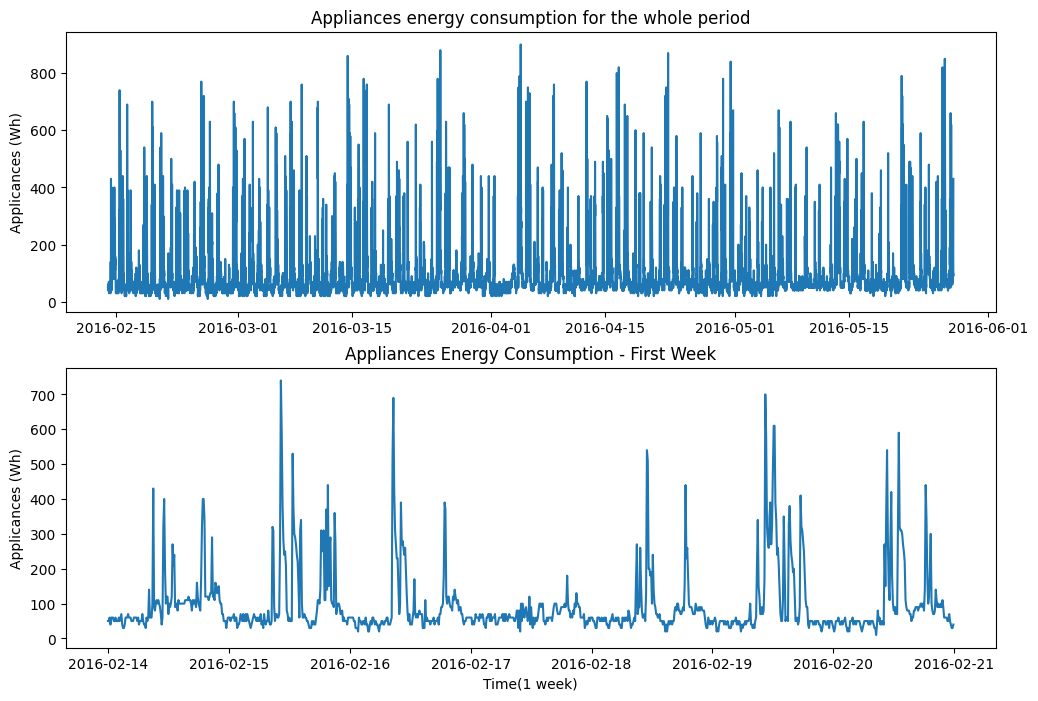

In [7]:
df_d['date'] = pd.to_datetime(df_d['date'])
df_d.set_index('date', inplace=True)

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
# Plot for the whole period
ax[0].plot(df_d.index, df_app)
ax[0].set_title('Appliances energy consumption for the whole period')
ax[0].set_ylabel('Applicances (Wh)')
# Plot for the first week
start_date = '2016-02-14'
end_date = '2016-02-20'
df_w1 = df_d.loc[start_date:end_date]

ax[1].plot(df_w1.index, df_w1['Appliances'])
ax[1].set_title('Appliances Energy Consumption - First Week')
ax[1].set_xlabel('Time(1 week)')
ax[1].set_ylabel('Applicances (Wh)')


In the paper it mentioned about the energy consumption shows a high variability. From the plot we can see that both time period plots show large fluctuations over time, frequent and significant spikes and dips. This means there might be a lot of noise and fluctuations, it makes modeling and prediction more challenging.

<function matplotlib.pyplot.show(close=None, block=None)>

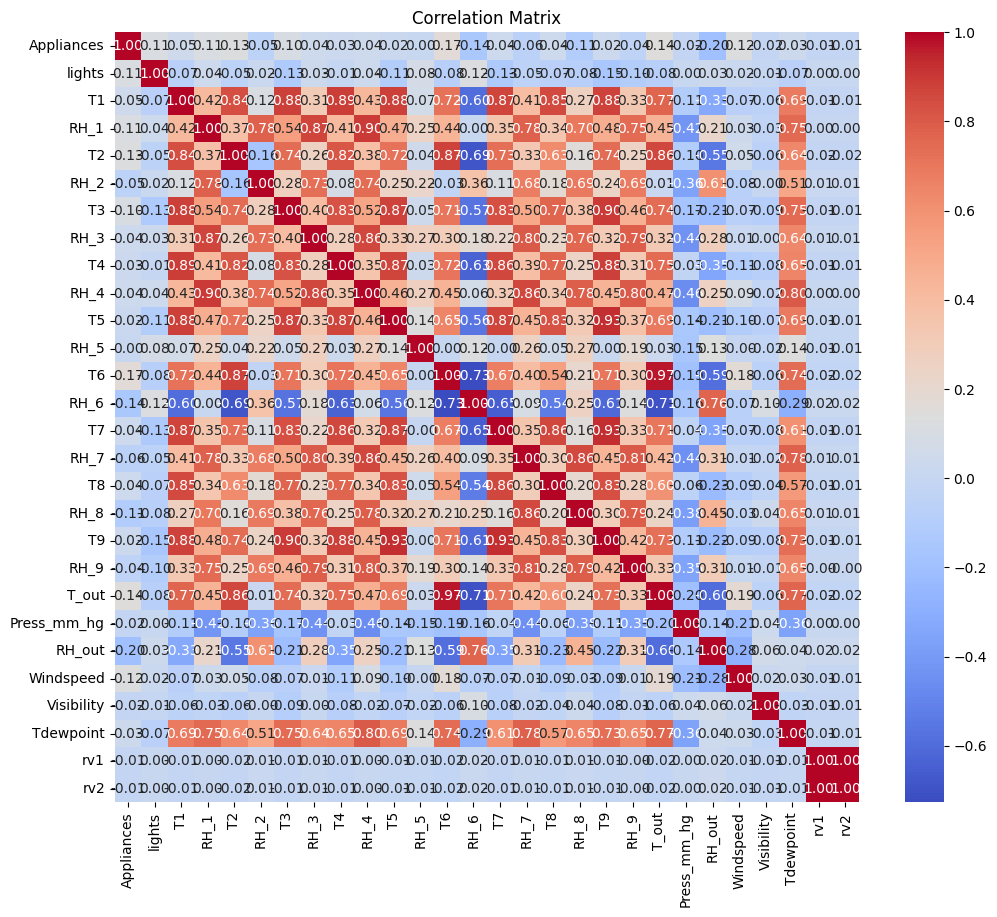

In [8]:
plt.figure(figsize=(12, 10))
corr_matrix = df_d.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show

From the heatmap, we could see the correlation between each feature, later we will do more details for picking up important features.

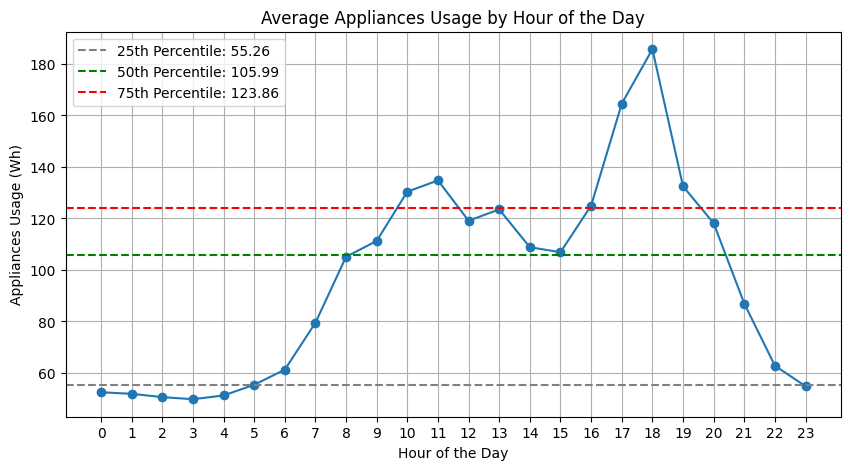

In [9]:
df_d['hour'] = df_d.index.hour

df_hourly = df_d.groupby('hour')['Appliances'].mean()

q3_hours = df_hourly.quantile(0.75)
q2_hours = df_hourly.quantile(0.5)
q1_hours = df_hourly.quantile(0.25)

plt.figure(figsize=(10, 5))
plt.plot(df_hourly.index, df_hourly.values, marker='o', linestyle='-')

plt.axhline(q1_hours, color='grey', linestyle='--', label=f'25th Percentile: {q1_hours:.2f}')
plt.axhline(q2_hours, color='green', linestyle='--', label=f'50th Percentile: {q2_hours:.2f}')
plt.axhline(q3_hours, color='red', linestyle='--', label=f'75th Percentile: {q3_hours:.2f}')

plt.title("Average Appliances Usage by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Appliances Usage (Wh)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.show()

From the graph we could see that at 23, 0-5 of the energy consumption is the lowest. By the contrast, at 10-11, 13, 16-19 of the energy consumption is the peak time of a day.

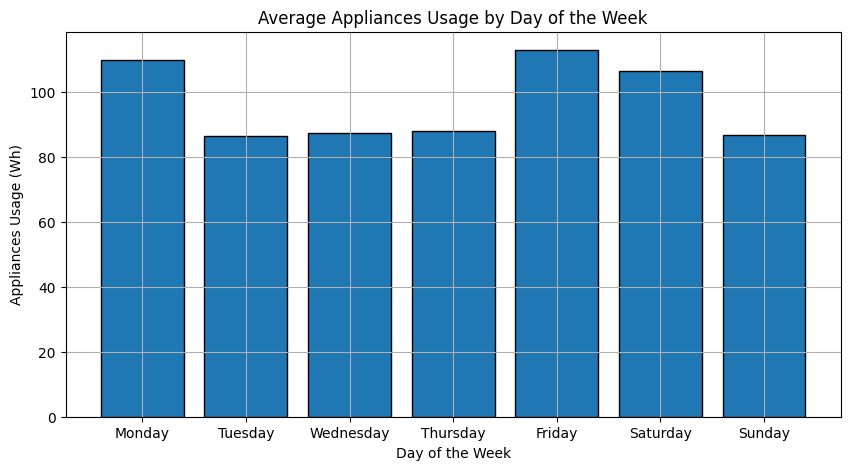

In [10]:
df_d['day_name'] = df_d.index.day_name()
df_d['day_of_week'] = df_d.index.dayofweek

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_day = df_d.groupby('day_name')['Appliances'].mean().reindex(order)

plt.figure(figsize=(10, 5))
plt.bar(df_day.index, df_day.values, edgecolor='black')
plt.title("Average Appliances Usage by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Appliances Usage (Wh)")
plt.grid(True)
plt.show()

From the chart, we can see that the average consumption of the week are concentrate on Monday, Friday and Saturday.

#### Adding NSM(Number of seconds from midnight) into the data

In [11]:
df_d.reset_index(inplace=True)
df_d['nsm'] = df_d['date'].dt.hour*3600 + df_d['date'].dt.minute*60 + df_d['date'].dt.second
df_d.set_index('date', inplace=True)

df_d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14941 entries, 2016-02-14 00:00:00 to 2016-05-27 18:00:00
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   14941 non-null  int64  
 1   lights       14941 non-null  int64  
 2   T1           14941 non-null  float64
 3   RH_1         14941 non-null  float64
 4   T2           14941 non-null  float64
 5   RH_2         14941 non-null  float64
 6   T3           14941 non-null  float64
 7   RH_3         14941 non-null  float64
 8   T4           14941 non-null  float64
 9   RH_4         14941 non-null  float64
 10  T5           14941 non-null  float64
 11  RH_5         14941 non-null  float64
 12  T6           14941 non-null  float64
 13  RH_6         14941 non-null  float64
 14  T7           14941 non-null  float64
 15  RH_7         14941 non-null  float64
 16  T8           14941 non-null  float64
 17  RH_8         14941 non-null  float64
 18  T9         

In [12]:
# Exclude non-numeric columns
numeric_df_d = df_d.select_dtypes(include=[np.number])
correlation_matrix = numeric_df_d.corr()
target_corr = correlation_matrix['Appliances']
print(target_corr.sort_values(ascending=False))

Appliances     1.000000
nsm            0.203718
hour           0.203463
T6             0.165871
T_out          0.143548
T2             0.125841
Windspeed      0.124067
lights         0.113350
RH_1           0.109805
T3             0.101288
T1             0.046560
RH_3           0.040565
T7             0.040444
T8             0.037397
RH_4           0.036971
Tdewpoint      0.033904
T4             0.027496
T9             0.023235
T5             0.015397
RH_5           0.004443
day_of_week   -0.003987
rv1           -0.014087
rv2           -0.014087
Press_mm_hg   -0.015611
Visibility    -0.016128
RH_9          -0.039729
RH_2          -0.053931
RH_7          -0.059697
RH_8          -0.112096
RH_6          -0.144340
RH_out        -0.197888
Name: Appliances, dtype: float64


From the table, the top 3 of features correlated with the target feature "Appliances" are nsm, hour, T_6. We will pick up all correlated features to be the predictors.

### 2. Pre-process the data

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

In [14]:
df_d.sort_index(inplace=True)

X = df_d[['nsm', 'hour', 'T6', 'T_out', 'T2', 'Windspeed', 'lights', 'RH_1', 'T3', 'T1', 'RH_3', 'T7', 'T8', 'RH_4', 'Tdewpoint', 'T4', 'T9', 'T5', 'RH_5']].copy()
y = df_d['Appliances']

split_index = int(len(df_d) * 0.75)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11205, 19)
(3736, 19)
(11205,)
(3736,)


#### Scaled

In [15]:
# numeric_features = df_d.select_dtypes(include=[np.number]).columns.tolist()
# numeric_features.remove('Appliances')  # Remove the target variable from the list

scaler = RobustScaler()
X_train_scaled = X_train.copy(deep=True)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = X_test.copy()
X_test_scaled = scaler.transform(X_test)


#### PCA


In [16]:
# # Use Chat GPT 3.5
# X_train_scaled_numeric = X_train_scaled

# pca = PCA()
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)

# print("\n--- PCA Shapes ---")
# print("X_train_pca shape:", X_train_pca.shape)
# print("X_test_pca shape:", X_test_pca.shape)

# # Plot cumulative explained variance to see how many components to keep
# plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('PCA Explained Variance')
# plt.grid(True)
# plt.show()

In [17]:
# # Use Chat GPT 3.5
# # Suppose your PCA object is named "pca"
# loadings = pca.components_

# # Get feature names (the numeric columns you used in PCA)
# feature_names = X_train.columns

# for i, pc in enumerate(loadings):
#     print(f"Principal Component {i+1}")
#     # Pair up each feature name with its loading in this PC
#     pc_loadings = list(zip(feature_names, pc))
#     # Sort by absolute value to see which features influence this PC the most
#     pc_loadings_sorted = sorted(pc_loadings, key=lambda x: abs(x[1]), reverse=True)
#     for feature, loading_value in pc_loadings_sorted[:5]:  # top 5 for brevity
#         print(f"  {feature}: {loading_value:.4f}")
#     print()


PCA gives a worse result in this case, thus we choose not to use it.

### 3. Implement, train and select prediction models

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from pygam import GAM, s,  LinearGAM, l
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#### Further dividing
For further dividing the training dataset part into initial training set (train set)  and development set (dev set).

In [19]:
split_index = int(len(X_train_scaled) * 0.8)

X_train_initial = X_train_scaled[:split_index]
X_dev = X_train_scaled[split_index:]

y_train_initial = y_train.iloc[:split_index]
y_dev = y_train.iloc[split_index:]


In [20]:
print(X_train_initial.shape)
print(X_dev.shape)
print(y_train_initial.shape)
print(y_dev.shape)

(8964, 19)
(2241, 19)
(8964,)
(2241,)


#### Linear Regression

In [21]:
lr_model = LinearRegression()

lr_model.fit(X_train_initial, y_train_initial)

y_pred = lr_model.predict(X_dev)

lr_mse_d = mean_squared_error(y_dev, y_pred)
lr_rmse_d = np.sqrt(lr_mse_d)
lr_r2_d = r2_score(y_dev, y_pred)

def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape
lr_mape_score = calculate_mape(y_dev, y_pred)

print("Linear Regression:")
print(f"RMSE: {lr_rmse_d}")
print(f"MSE: {lr_mse_d}")
print(f"R²: {lr_r2_d}")
print(f'MAPE: {lr_mape_score}')

Linear Regression:
RMSE: 96.00967274797834
MSE: 9217.857261173896
R²: 0.09974333707015026
MAPE: 67.50088416612786


#### GAM

In [22]:
gam = GAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9))

gam.gridsearch(X_train_initial, y_train_initial, lam=[0.01, 0.1, 1, 10, 100])

y_pred_gam = gam.predict(X_dev)

gam_mse_d = mean_squared_error(y_dev, y_pred_gam)
gam_rmse_d = np.sqrt(gam_mse_d)
gam_r2_d = r2_score(y_dev, y_pred_gam)
gam_mape_score = calculate_mape(y_dev, y_pred_gam)


  0% (0 of 5) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--
 20% (1 of 5) |#####                     | Elapsed Time: 0:00:01 ETA:   0:00:04
 40% (2 of 5) |##########                | Elapsed Time: 0:00:02 ETA:   0:00:03
 60% (3 of 5) |###############           | Elapsed Time: 0:00:02 ETA:   0:00:01
 80% (4 of 5) |####################      | Elapsed Time: 0:00:03 ETA:   0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:04 Time:  0:00:04


In [23]:
print("GAM:")
print(f"RMSE: {gam_rmse_d}")
print(f"MSE: {gam_mse_d}")
print(f"R²: {gam_r2_d}")
print(f'MAPE: {gam_mape_score}')

GAM:
RMSE: 96.82295204596916
MSE: 9374.684042896042
R²: 0.08442694073519241
MAPE: 64.17749122025967


#### Linear GAM

In [24]:
gam = LinearGAM(
    l(0) + s(1) + l(2) + s(3) + l(4) + s(5) + l(6) + s(7) + s(8) + s(9)
)

gam.gridsearch(X_train_initial, y_train_initial , lam=[0.01, 0.1, 1, 10, 100])

y_pred_gam = gam.predict(X_dev)

lrgam_mse_d = mean_squared_error(y_dev, y_pred_gam)
lrgam_rmse_d = np.sqrt(lrgam_mse_d)
lrgam_r2_d = r2_score(y_dev, y_pred_gam)
lrgam_mape_score = calculate_mape(y_dev, y_pred_gam)

  0% (0 of 5) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--
 20% (1 of 5) |#####                     | Elapsed Time: 0:00:00 ETA:   0:00:02
 40% (2 of 5) |##########                | Elapsed Time: 0:00:01 ETA:   0:00:01
 60% (3 of 5) |###############           | Elapsed Time: 0:00:01 ETA:   0:00:01
 80% (4 of 5) |####################      | Elapsed Time: 0:00:02 ETA:   0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:02 Time:  0:00:02


In [25]:
print("lrGAM:")
print(f"RMSE: {lrgam_rmse_d}")
print(f"MSE: {lrgam_mse_d}")
print(f"R²: {lrgam_r2_d}")
print(f'MAPE: {lrgam_mape_score}')

lrGAM:
RMSE: 95.75393406397033
MSE: 9168.815888727178
R²: 0.10453293415909015
MAPE: 62.813755466783505


#### Random Forest

In [26]:
param_grid = {
    'n_estimators': [100, 200, 300],     
    'max_depth': [5, 10, 20],      
    'criterion': ["squared_error", 'friedman_mse']
}
rf = RandomForestRegressor(random_state=1)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid={**param_grid},
    scoring='neg_mean_squared_error', 
    cv=10,
    verbose=1,                            
    n_jobs=-1
)

grid_search.fit(X_train_initial, y_train_initial)

best_rf = grid_search.best_estimator_

y_pred_rf = best_rf.predict(X_dev)

rf_mse_d = mean_squared_error(y_dev, y_pred_rf)
rf_r2_d = r2_score(y_dev, y_pred_rf)
rf_rmse_d = np.sqrt(mean_squared_error(y_dev, y_pred_rf))
rf_mape_score = calculate_mape(y_dev, y_pred_rf)

print("Random Forest:")
print(f"RMSE: {rf_rmse_d}")
print(f"MSE: {rf_mse_d}")
print(f"R^2: {rf_r2_d}")
print(f'MAPE: {rf_mape_score}')

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Random Forest:
RMSE: 96.31159970748328
MSE: 9275.924238214495
R^2: 0.09407225956310539
MAPE: 58.00757321587352


All models' RMSE are roughly the same and they are in a normal scope. However, MSE shows a larger score and it is not a good sign for each model. All models have this problem. Each model's R^2 score is between 8% ~ 10%, it means each model only explains 8-10% of variance. On the other word, it is really weak. For the final score MAPE, each of model shows over 50% off on average. Also means poor performance.

### 4. Test the final model and analyse results
From this part, we will retrain the data by original training dataset, then do the final validation with test set.

#### Linear Regression

In [27]:
lr_model = LinearRegression()

lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)

lr_mse_t = mean_squared_error(y_test, y_pred)
lr_rmse_t = np.sqrt(lr_mse_t)
lr_r2_t = r2_score(y_test, y_pred)
lr_mape_score = calculate_mape(y_test, y_pred)

print("Linear Regression:")
print(f"RMSE: {lr_rmse_t}")
print(f"MSE: {lr_mse_t}")
print(f"R²: {lr_r2_t}")
print(f'MAPE: {lr_mape_score}')

Linear Regression:
RMSE: 83.2968918228869
MSE: 6938.372187353724
R²: 0.07648068829966503
MAPE: 55.917244638714294


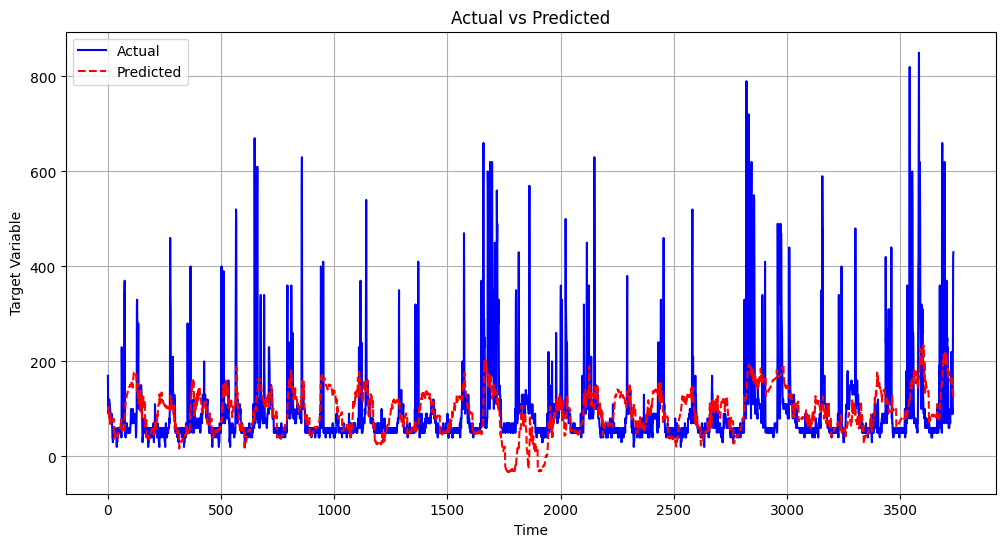

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", linestyle="-", color="blue")
plt.plot(y_pred, label="Predicted", linestyle="--", color="red")
plt.xlabel("Time")
plt.ylabel("Target Variable")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()

#### GAM

In [29]:
gam = GAM(
    s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9)
)
gam.gridsearch(X_train_scaled, y_train, lam=[0.01, 0.1, 1, 10, 100])

y_pred_gam = gam.predict(X_test_scaled)

gam_mse_t = mean_squared_error(y_test, y_pred_gam)
gam_rmse_t = np.sqrt(gam_mse_t)
gam_r2_t = r2_score(y_test, y_pred_gam)
gam_mape_score = calculate_mape(y_test, y_pred_gam)


  0% (0 of 5) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--
 20% (1 of 5) |#####                     | Elapsed Time: 0:00:00 ETA:   0:00:03
 40% (2 of 5) |##########                | Elapsed Time: 0:00:01 ETA:   0:00:02
 60% (3 of 5) |###############           | Elapsed Time: 0:00:02 ETA:   0:00:01
 80% (4 of 5) |####################      | Elapsed Time: 0:00:03 ETA:   0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:04 Time:  0:00:04


GAM:
RMSE: 164.24502140524902
MSE: 26976.42705641071
R²: -2.59064787453735
MAPE: 164.58470252866206


In [36]:
print("GAM:")
print(f"RMSE: {gam_rmse_t}")
print(f"MSE: {gam_mse_t}")
print(f"R²: {gam_r2_t}")
print(f'MAPE: {gam_mape_score}')

GAM:
RMSE: 164.24502140524902
MSE: 26976.42705641071
R²: -2.59064787453735
MAPE: 164.58470252866206


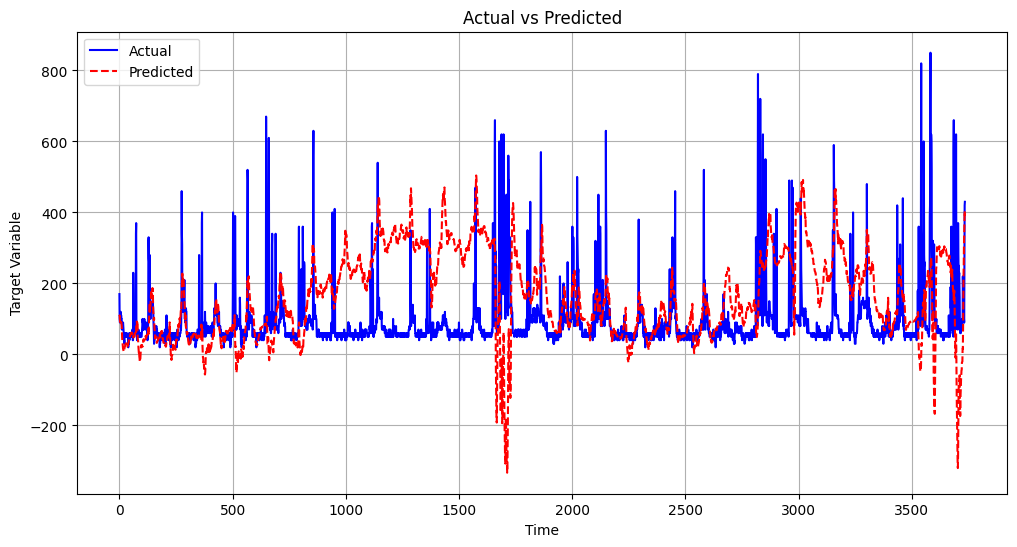

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", linestyle="-", color="blue")
plt.plot(y_pred_gam, label="Predicted", linestyle="--", color="red")
plt.xlabel("Time")
plt.ylabel("Target Variable")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()

#### Linear GAM

In [31]:
gam = LinearGAM(
    l(0) + s(1) + l(2) + s(3) + l(4) + s(5) + l(6) + s(7) + l(8) + s(9)
)

gam.gridsearch(X_train_scaled, y_train, lam=[0.01, 0.1, 1, 10, 100])

y_pred_gam = gam.predict(X_test_scaled)

lrgam_mse_t = mean_squared_error(y_test, y_pred_gam)
lrgam_rmse_t = np.sqrt(lrgam_mse_t)
lrgam_r2_t = r2_score(y_test, y_pred_gam)
lrgam_mape_score = calculate_mape(y_test, y_pred_gam)



  0% (0 of 5) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--
 20% (1 of 5) |#####                     | Elapsed Time: 0:00:00 ETA:   0:00:02
 40% (2 of 5) |##########                | Elapsed Time: 0:00:01 ETA:   0:00:02
 60% (3 of 5) |###############           | Elapsed Time: 0:00:02 ETA:   0:00:01
 80% (4 of 5) |####################      | Elapsed Time: 0:00:02 ETA:   0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:03 Time:  0:00:03


In [32]:
print("lrGAM:")
print(f"RMSE: {lrgam_rmse_t}")
print(f"MSE: {lrgam_mse_t}")
print(f"R²: {lrgam_r2_t}")
print(f'MAPE: {lrgam_mape_score}')

lrGAM:
RMSE: 175.4849489600228
MSE: 30794.9673115018
R²: -3.0989076756632308
MAPE: 186.3080714151547


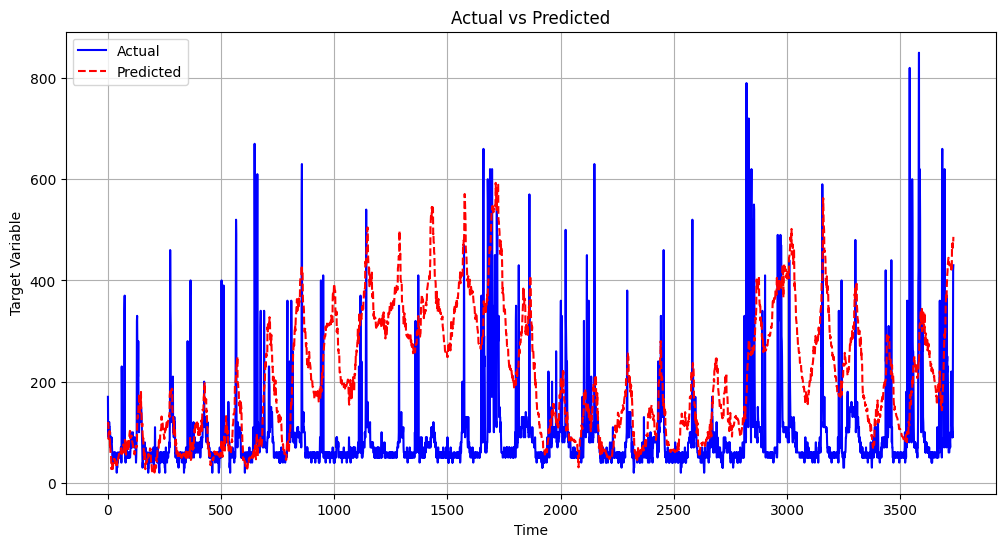

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", linestyle="-", color="blue")
plt.plot(y_pred_gam, label="Predicted", linestyle="--", color="red")
plt.xlabel("Time")
plt.ylabel("Target Variable")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()

#### Random Forest

In [34]:
param_grid = {
    'n_estimators': [100, 200, 300],     
    'max_depth': [5, 10, 20],      
    'criterion': ["squared_error", 'friedman_mse']
}
rf = RandomForestRegressor(random_state=1)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid={**param_grid},
    scoring='neg_mean_squared_error', 
    cv=10,
    verbose=1,                            
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

best_rf = grid_search.best_estimator_

y_pred_rf = best_rf.predict(X_test_scaled)

rf_mse_t = mean_squared_error(y_test, y_pred_rf)
rf_r2_t = r2_score(y_test, y_pred_rf)
rf_rmse_t = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_mape_score = calculate_mape(y_test, y_pred_rf)

print("Random Forest:")
print(f"RMSE: {rf_rmse_t}")
print(f"MSE: {rf_mse_t}")
print(f"R^2: {rf_r2_t}")
print(f'MAPE: {rf_mape_score}')

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Random Forest:
RMSE: 199.64597827030855
MSE: 39858.51663950852
R^2: -4.30529479514049
MAPE: 226.89745265848748


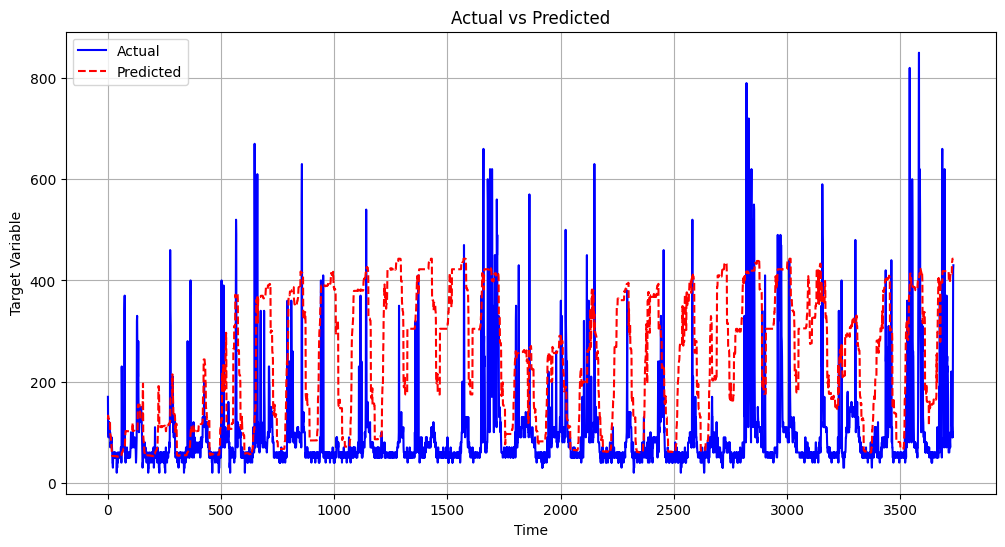

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", linestyle="-", color="blue")
plt.plot(y_pred_rf, label="Predicted", linestyle="--", color="red")
plt.xlabel("Time")
plt.ylabel("Target Variable")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()

For linear regression, RMSE and MAPE decreased, it means the model performed better on unseen test data. However, for other models two scores show a significant bad performance. It shows a terrible results. For R^2 score, every models drop. For linear regression, its R^2 drop slightly, but for the rest of models drop serious badly.

For Linear regression, it performed relatively well on both the development and test sets compared to other models.
GAM and Linear GAM performed pretty bad on the test set. It means both models show a weak generalization.
Random Forest was particularly unstable. It shows the highest test error, it presented severe overfitting or failed to handle the dataset.


### 5. Reflection

At the first step I tried to perform similar analyse with the paper. Step by step, I tried to find a correlation between target and predictors. Some of analyses might not be used since they are not related to the target variance. I tried several methods but eventually I decided to use those features according to correlation matrix. But as the results, I didn't perform well on this step, I'll try to improve this step to get better understanding on the EDA part and also get higher correlated features for target variance. For pre-process step, I followed the requirement from the assignment description to split train:test dataset to 75:25. For scale selection, I used standard scaler first, but after few test I decided to use Robustscaler since I hope it can perform better result, but it seems doesn’t work. I also tried to use PCA and it made the results more worse thus I droped it. After pre-processing, I did split again to get development dataset from original train dataset and the retio is 80:20 as the requirement. On the building models side, I tried to use Linear Regression, GAM, Linear GAM, and Random Forest. For the validation step, the performance of all model looks not good but in an acceptable scope. However, after trying on the unseen dataset, the performance turned significant terrible. Except features picking part,there are many parts I did not well. After this assignment, I will try to improve several parts to make it well and use it on the next assignement.


### 6. References

* Candanendo, LM, Feldheim, V, Deramaix, D 2017, 'Energy and Buildings', *Elsevier*, pp. 81-97, DOI:10.1016/j.enbuild.2017.01.083
* https://www.kdnuggets.com/2017/04/time-series-analysis-generalized-additive-models.html
* https://machinelearningmastery.com/random-forest-for-time-series-forecasting/

### 7. Appendix

Use this section as needed for longer analysis and expanded charting